Đang tải model và dữ liệu...
Đang dự đoán trên 90 phiên giao dịch gần nhất...
Tính toán xong! (RMSE: 19.37 | MAPE: 6.21%)


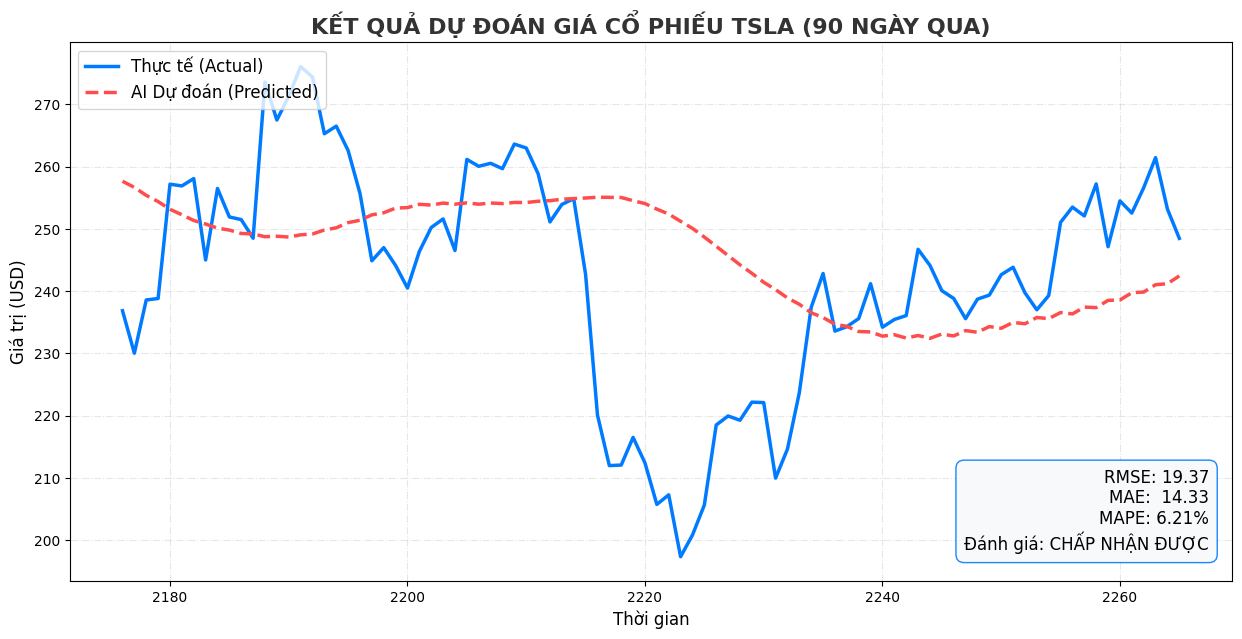

--- KẾT QUẢ CHI TIẾT CHO TSLA ---
1. Sai số toàn phương trung bình (RMSE): 19.3695
2. Sai số tuyệt đối trung bình (MAE):    14.3266
3. Sai số phần trăm trung bình (MAPE):   6.21%
4. Kết luận: Mô hình hoạt động CHẤP NHẬN ĐƯỢC


In [3]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cấu hình đường dẫn
STOCK_SYMBOL = "TSLA" 
MODEL_PATH = f"../experiments/{STOCK_SYMBOL}.keras"
CSV_PATH = f"../data/raw/{STOCK_SYMBOL}.csv"

# 1. Load Model & Data
if not os.path.exists(MODEL_PATH):
    print(f"Không tìm thấy file model tại {MODEL_PATH}")
else:
    print(f"Đang tải model và dữ liệu...")
    model = load_model(MODEL_PATH)

    # Đọc dữ liệu
    df = pd.read_csv(CSV_PATH)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close'])
    
    # Xử lý ngày tháng chuẩn xác
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    data = df.filter(['Close']).values

    # 2. Chuẩn bị dữ liệu Test
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Cấu hình số ngày test
    LOOK_BACK = 60
    TEST_DAYS = 90
    
    if len(scaled_data) < (LOOK_BACK + TEST_DAYS):
        TEST_DAYS = len(scaled_data) - LOOK_BACK

    # Tạo dữ liệu test (Sliding Window)
    start_idx = len(scaled_data) - TEST_DAYS - LOOK_BACK
    test_segment = scaled_data[start_idx:]
    
    x_test = []
    y_true_scaled = []
    
    for i in range(LOOK_BACK, len(test_segment)):
        x_test.append(test_segment[i-LOOK_BACK:i, 0])
        y_true_scaled.append(test_segment[i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_true_scaled = np.array(y_true_scaled)

    # 3. Dự đoán
    print(f"Đang dự đoán trên {TEST_DAYS} phiên giao dịch gần nhất...")
    predictions_scaled = model.predict(x_test, verbose=0)
    
    # Đảo ngược scale về giá USD thật
    predictions = scaler.inverse_transform(predictions_scaled)
    y_true = scaler.inverse_transform(y_true_scaled.reshape(-1, 1))

    # 4. Tính chỉ số đánh giá
    rmse = math.sqrt(mean_squared_error(y_true, predictions))
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    # Lấy ngày tháng để vẽ
    display_dates = df.index[-TEST_DAYS:]

    print(f"Tính toán xong! (RMSE: {rmse:.2f} | MAPE: {mape:.2f}%)")
    
    # 5. Vẽ biểu đồ báo cáo
plt.figure(figsize=(15, 7))

# Vẽ 2 đường: Thực tế vs Dự đoán
plt.plot(display_dates, y_true, color='#007bff', label='Thực tế (Actual)', linewidth=2.5)
plt.plot(display_dates, predictions, color='#ff4d4d', label='AI Dự đoán (Predicted)', linewidth=2.5, linestyle='--')

# Trang trí biểu đồ
plt.title(f'KẾT QUẢ DỰ ĐOÁN GIÁ CỔ PHIẾU {STOCK_SYMBOL} (90 NGÀY QUA)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá trị (USD)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='-.')

# Hiển thị bảng chỉ số đánh giá (Góc trên bên phải)
# Logic đánh giá
status = "RẤT TỐT" if mape < 5 else "CHẤP NHẬN ĐƯỢC"
stats_text = (
    f'RMSE: {rmse:.2f}\n'
    f'MAE:  {mae:.2f}\n'
    f'MAPE: {mape:.2f}%\n'
    f'Đánh giá: {status}'
)

# Vẽ khung chứa thông số
plt.text(0.98, 0.05, stats_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#f8f9fa', alpha=0.9, edgecolor='#007bff'))

plt.show()

# In kết quả ra màn hình console bên dưới cho dễ copy vào báo cáo
print(f"--- KẾT QUẢ CHI TIẾT CHO {STOCK_SYMBOL} ---")
print(f"1. Sai số toàn phương trung bình (RMSE): {rmse:.4f}")
print(f"2. Sai số tuyệt đối trung bình (MAE):    {mae:.4f}")
print(f"3. Sai số phần trăm trung bình (MAPE):   {mape:.2f}%")
print(f"4. Kết luận: Mô hình hoạt động {status}")

Đang tải model và dữ liệu...
Đang dự đoán trên 90 phiên giao dịch gần nhất...
Tính toán xong! (RMSE: 8.17 | MAPE: 3.59%)


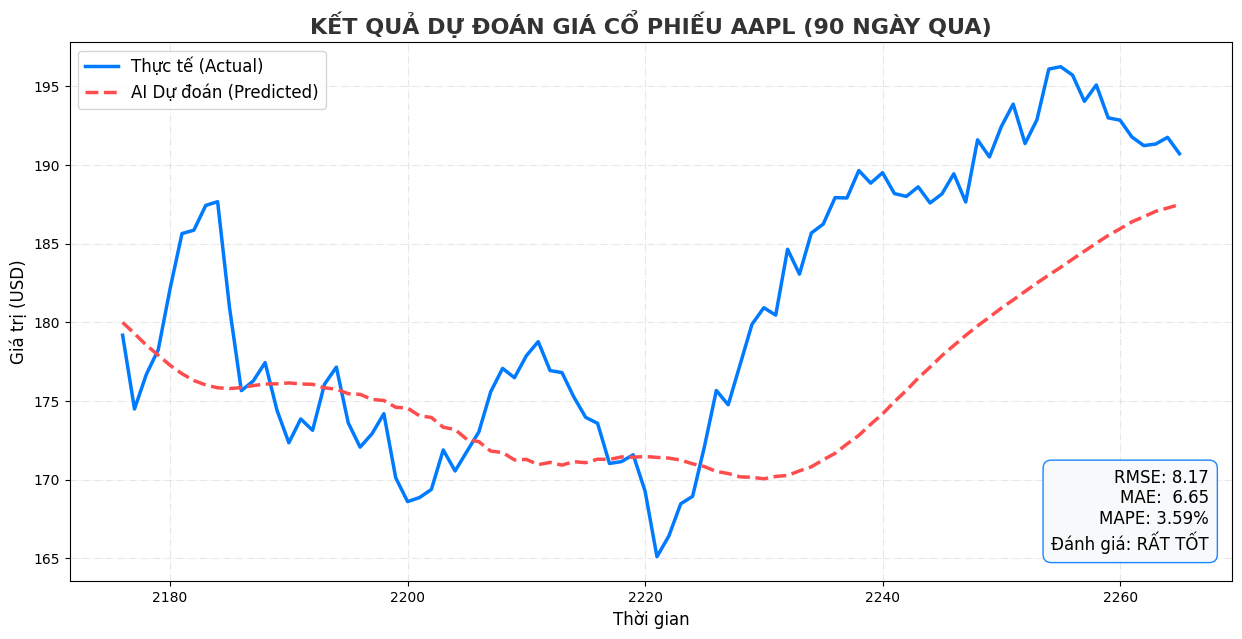

--- KẾT QUẢ CHI TIẾT CHO AAPL ---
1. Sai số toàn phương trung bình (RMSE): 8.1655
2. Sai số tuyệt đối trung bình (MAE):    6.6465
3. Sai số phần trăm trung bình (MAPE):   3.59%
4. Kết luận: Mô hình hoạt động RẤT TỐT


In [4]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cấu hình đường dẫn
STOCK_SYMBOL = "AAPL" 
MODEL_PATH = f"../experiments/{STOCK_SYMBOL}.keras"
CSV_PATH = f"../data/raw/{STOCK_SYMBOL}.csv"

# 1. Load Model & Data
if not os.path.exists(MODEL_PATH):
    print(f"Không tìm thấy file model tại {MODEL_PATH}")
else:
    print(f"Đang tải model và dữ liệu...")
    model = load_model(MODEL_PATH)

    # Đọc dữ liệu
    df = pd.read_csv(CSV_PATH)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close'])
    
    # Xử lý ngày tháng chuẩn xác
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    data = df.filter(['Close']).values

    # 2. Chuẩn bị dữ liệu Test
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Cấu hình số ngày test
    LOOK_BACK = 60
    TEST_DAYS = 90
    
    if len(scaled_data) < (LOOK_BACK + TEST_DAYS):
        TEST_DAYS = len(scaled_data) - LOOK_BACK

    # Tạo dữ liệu test (Sliding Window)
    start_idx = len(scaled_data) - TEST_DAYS - LOOK_BACK
    test_segment = scaled_data[start_idx:]
    
    x_test = []
    y_true_scaled = []
    
    for i in range(LOOK_BACK, len(test_segment)):
        x_test.append(test_segment[i-LOOK_BACK:i, 0])
        y_true_scaled.append(test_segment[i, 0])
        
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_true_scaled = np.array(y_true_scaled)

    # 3. Dự đoán
    print(f"Đang dự đoán trên {TEST_DAYS} phiên giao dịch gần nhất...")
    predictions_scaled = model.predict(x_test, verbose=0)
    
    # Đảo ngược scale về giá USD thật
    predictions = scaler.inverse_transform(predictions_scaled)
    y_true = scaler.inverse_transform(y_true_scaled.reshape(-1, 1))

    # 4. Tính chỉ số đánh giá
    rmse = math.sqrt(mean_squared_error(y_true, predictions))
    mae = mean_absolute_error(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    # Lấy ngày tháng để vẽ
    display_dates = df.index[-TEST_DAYS:]

    print(f"Tính toán xong! (RMSE: {rmse:.2f} | MAPE: {mape:.2f}%)")
    
    # 5. Vẽ biểu đồ báo cáo
plt.figure(figsize=(15, 7))

# Vẽ 2 đường: Thực tế vs Dự đoán
plt.plot(display_dates, y_true, color='#007bff', label='Thực tế (Actual)', linewidth=2.5)
plt.plot(display_dates, predictions, color='#ff4d4d', label='AI Dự đoán (Predicted)', linewidth=2.5, linestyle='--')

# Trang trí biểu đồ
plt.title(f'KẾT QUẢ DỰ ĐOÁN GIÁ CỔ PHIẾU {STOCK_SYMBOL} (90 NGÀY QUA)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Giá trị (USD)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='-.')

# Hiển thị bảng chỉ số đánh giá (Góc trên bên phải)
# Logic đánh giá
status = "RẤT TỐT" if mape < 5 else "CHẤP NHẬN ĐƯỢC"
stats_text = (
    f'RMSE: {rmse:.2f}\n'
    f'MAE:  {mae:.2f}\n'
    f'MAPE: {mape:.2f}%\n'
    f'Đánh giá: {status}'
)

# Vẽ khung chứa thông số
plt.text(0.98, 0.05, stats_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#f8f9fa', alpha=0.9, edgecolor='#007bff'))

plt.show()

# In kết quả ra màn hình console bên dưới cho dễ copy vào báo cáo
print(f"--- KẾT QUẢ CHI TIẾT CHO {STOCK_SYMBOL} ---")
print(f"1. Sai số toàn phương trung bình (RMSE): {rmse:.4f}")
print(f"2. Sai số tuyệt đối trung bình (MAE):    {mae:.4f}")
print(f"3. Sai số phần trăm trung bình (MAPE):   {mape:.2f}%")
print(f"4. Kết luận: Mô hình hoạt động {status}")